In [32]:
# import dependencies
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize
import re
import itertools
import matplotlib.pyplot as plt

## nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag

import spacy
nlp = spacy.load('en')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# CONVERT "REAL" AND "FAKE" LABELS TO 0 AND 1 TO MAKE THEM MACHINE READABLE
# word_tokens = word_tokenize()
# ps = PorterStemmer() # creating an instance of PorterStemmer class

stop_words = set(stopwords.words("english")) # create list of stop words
def cleantext(string):
    text = string.lower().split() # convert letters to lowercase and split claims ('tweets') into separate words
    text = " ".join(text) # ???
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text) # replace '&' with ' and '
    text = text.replace('&amp',' ') # replace '&amp' with empty space
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text) # replace non-letters, non-numbers, & punctuation with empty space
    text = text.split() # ??? 
    #text = [ps.stem(word) for word in text] # set text equal to stemmed words
    text = [w for w in text if not w in stop_words] # remove stop words 
    text = " ".join(text) # joining the seperated pieces of string into one string
    return text

# apply cleantext() function to all tweets 
new_data['statement'] = new_data['statement'].map(lambda x: cleantext(x))


<function matplotlib.pyplot.show>

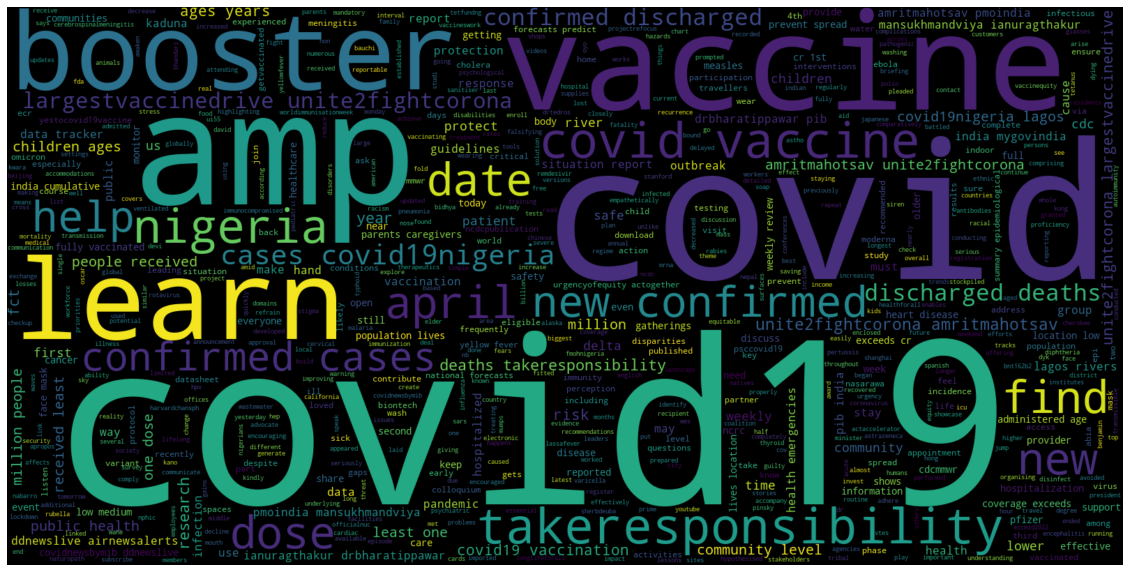

In [27]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data[new_data.label == "real"].statement))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

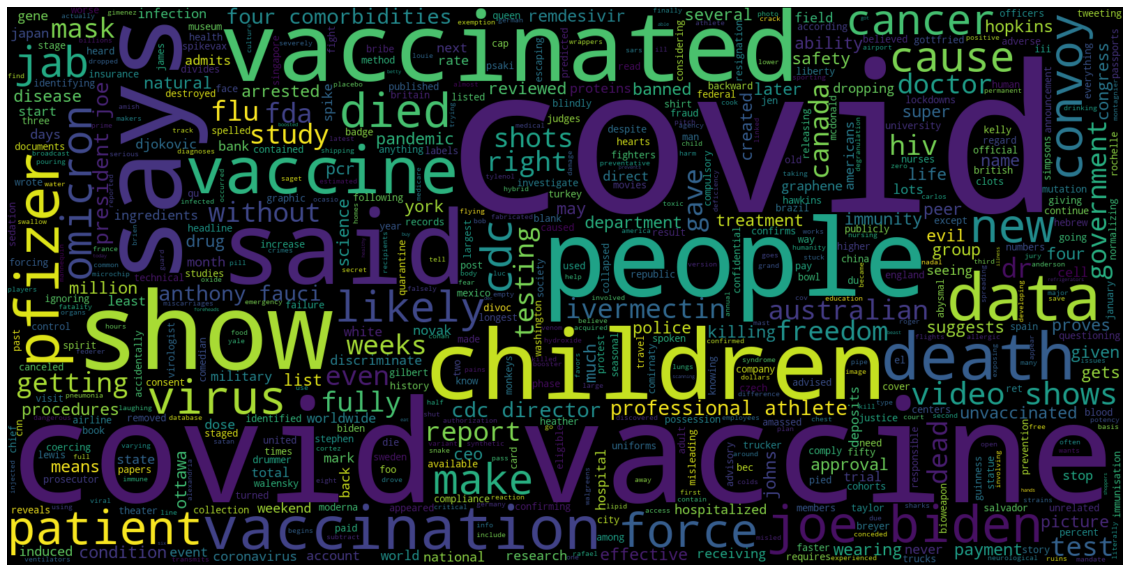

In [28]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data[new_data.label == "fake"].statement))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

In [30]:
pip install scattertext

     |████████████████████████████████| 7.3 MB 4.7 MB/s 
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=53ef3b785f2b05a46d10988a92e8e4b8acff3a40eebb73adca8e6482ae3cb5a0
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [31]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [35]:
new_data['statement'] = new_data['statement'].apply(nlp)

In [36]:
corpus = st.CorpusFromParsedDocuments(new_data, category_col='label', parsed_col='statement').build()

In [37]:
html = produce_scattertext_explorer(corpus,
                             category='real',
                             category_name='real',
                              not_category_name='fake',
                              width_in_pixels=1000,
                              minimum_term_frequency=5,
                              transform=st.Scalers.log_scale_standardize,
                              metadata=new_data['statement'])

In [ ]:
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))